## Importing libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import warnings

from math import isnan, sqrt, log
from scipy import stats
from scipy.special import comb

warnings.filterwarnings('ignore')
sns.set(color_codes=True)

## Data Reading

In [2]:
#Reading the JSON file for Apple
df_raw = pd.read_json(r"C:\Users\santo\Desktop\Data\Apple\Apple\apple.json", lines=True) 

In [3]:
#Display the Dataframe
df_raw.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,None,2019-10-13 02:46:04,"[0, 138]","{'hashtags': [{'text': 'Watch', 'indices': [11...","{'media': [{'id': 1183212275882029056, 'id_str...",0,False,Samsung’s Galaxy Watch Active 2 is a solid sma...,None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""https://nustrivia.com"" rel=""nofollow""...",False,"{'id': 1164587551874699264, 'id_str': '1164587..."
1,NaN,None,2019-10-13 02:46:02,"[0, 134]","{'hashtags': [{'text': 'Apple', 'indices': [94...",NaN,0,False,Caramel Apple Pie Bombs 5 Ingredient Breakfa...,None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""https://www.ansve.com"" rel=""nofollow""...",False,"{'id': 811751590210088960, 'id_str': '81175159..."
2,NaN,None,2019-10-13 02:45:21,"[0, 107]","{'hashtags': [{'text': 'TeamBossyGals', 'indic...",NaN,0,False,❤R∈TW∈∈T if you NEED MORE FOLLOWERS❤ Join #Tea...,None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",False,"{'id': 543554575, 'id_str': '543554575', 'name..."
3,NaN,None,2019-10-13 02:44:45,"[0, 144]","{'hashtags': [{'text': 'apple', 'indices': [59...",NaN,0,False,RT @FrontiersIn: To the heroes among you who e...,None,...,0.0,NaN,NaN,NaN,335,False,{'created_at': 'Tue Oct 08 11:00:00 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1021556907922735104, 'id_str': '1021556..."
4,NaN,None,2019-10-13 02:44:07,"[0, 250]","{'hashtags': [{'text': 'Apple', 'indices': [62...",NaN,0,False,It's on pre-order at certain online bookstores...,None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.oneupapp.io"" rel=""nofollow...",False,"{'id': 583923488, 'id_str': '583923488', 'name..."


In [4]:
#Displaying the Info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 31 columns):
contributors                 0 non-null float64
coordinates                  34 non-null object
created_at                   2847 non-null datetime64[ns]
display_text_range           2847 non-null object
entities                     2847 non-null object
extended_entities            851 non-null object
favorite_count               2847 non-null int64
favorited                    2847 non-null bool
full_text                    2847 non-null object
geo                          34 non-null object
id                           2847 non-null int64
id_str                       2847 non-null int64
in_reply_to_screen_name      158 non-null object
in_reply_to_status_id        122 non-null float64
in_reply_to_status_id_str    122 non-null float64
in_reply_to_user_id          158 non-null float64
in_reply_to_user_id_str      158 non-null float64
is_quote_status              2847 non-null bool


In [5]:
df_raw["user"][0]

{'id': 1164587551874699264,
 'id_str': '1164587551874699264',
 'name': 'BreakingAI',
 'screen_name': 'breaking_ai',
 'location': 'Vancouver, BC',
 'description': "Breaking news stories on tech, business, and science. I'm an AI-human partnership. #tech #AI #software #business #science 🤖🧚\u200d♂️🐞🦋",
 'url': 'https://t.co/APmvrhXL2g',
 'entities': {'url': {'urls': [{'url': 'https://t.co/APmvrhXL2g',
     'expanded_url': 'https://nustrivia.com',
     'display_url': 'nustrivia.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 85,
 'friends_count': 133,
 'listed_count': 1,
 'created_at': 'Thu Aug 22 17:18:12 +0000 2019',
 'favourites_count': 10,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 8785,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 

In [6]:
#Checking all the columns
df_raw.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [7]:
# Printing First Entity 
df_raw["entities"][0]

{'hashtags': [{'text': 'Watch', 'indices': [111, 117]},
  {'text': 'Apple', 'indices': [118, 124]},
  {'text': 'Apples', 'indices': [125, 132]},
  {'text': 'tech', 'indices': [133, 138]}],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/9x8QgkPPok',
   'expanded_url': 'https://rius.ca/social_story/201910130246444/',
   'display_url': 'rius.ca/social_story/2…',
   'indices': [86, 109]}],
 'media': [{'id': 1183212275882029056,
   'id_str': '1183212275882029056',
   'indices': [139, 162],
   'media_url': 'http://pbs.twimg.com/media/EGudS8XUcAAMIG7.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/EGudS8XUcAAMIG7.jpg',
   'url': 'https://t.co/EbX1HcgMhp',
   'display_url': 'pic.twitter.com/EbX1HcgMhp',
   'expanded_url': 'https://twitter.com/breaking_ai/status/1183212277480116225/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 600, 'h': 400, 'resize': 'fit'},
    'small': {'w': 600, 'h': 400, 'resi

## Data Extraction

In [8]:
# New Data Frame is Created
df = pd.DataFrame()

### Extract user information

In [9]:
#"owner" of the status in which they can reply, mention or retweet other users
df["owner_name"] = df_raw["user"].apply(lambda x: x["screen_name"])
df["owner_id"] = df_raw["user"].apply(lambda x: x["id_str"])
df["owner_nfollowers"] = df_raw["user"].apply(lambda x: x["followers_count"])
df["owner_nfriends"] = df_raw["user"].apply(lambda x: x["friends_count"])

In [10]:
# Dataframe is displayed
df.head()

,owner_name,owner_id,owner_nfollowers,owner_nfriends
0,breaking_ai,1164587551874699264,85,133
1,tomleo83,811751590210088960,122,267
2,ArtBubblesArt,543554575,15367,15983
3,razak_zamri,1021556907922735104,44,3
4,StephenBentley8,583923488,13943,12487


### Extract user mentions

In [11]:
#List of user_id/username who are mentioned will be gathered in the data frame. Null interaction will be encoded as None.
df["user_mentioned_name"] = df_raw["entities"].apply(lambda x: ':'.join([user["screen_name"] for user in x["user_mentions"]]) if x["user_mentions"] else None)
df["user_mentioned_id"] = df_raw["entities"].apply(lambda x: ':'.join([user["id_str"] for user in x["user_mentions"]]) if x["user_mentions"] else None)

### Extract user retweet

In [12]:
#Gathering retweeted in this status who is username/id of user. None will be replaced with NULL
df["user_retweeted_name"] = df_raw["retweeted_status"].apply(lambda x: x["user"]["screen_name"] if x is not np.nan else None)
df["user_retweeted_id"] = df_raw["retweeted_status"].apply(lambda x: x["user"]["id_str"] if x is not np.nan else None)

In [13]:
#Dataframe is displayed
df.head()

,owner_name,owner_id,owner_nfollowers,owner_nfriends,user_mentioned_name,user_mentioned_id,user_retweeted_name,user_retweeted_id
0,breaking_ai,1164587551874699264,85,133,None,None,None,None
1,tomleo83,811751590210088960,122,267,None,None,None,None
2,ArtBubblesArt,543554575,15367,15983,None,None,None,None
3,razak_zamri,1021556907922735104,44,3,FrontiersIn,86292908,FrontiersIn,86292908
4,StephenBentley8,583923488,13943,12487,None,None,None,None


### Extract user reply

In [14]:
#Extracting user Reply
df["user_replied_name"] = df_raw["in_reply_to_screen_name"]
df["user_replied_status_id"] = df_raw["in_reply_to_status_id"].apply(lambda x: None if isnan(x) else str(int(x)))
df["user_replied_id"] = df_raw["in_reply_to_user_id"].apply(lambda x: None if isnan(x) else str(int(x)))

In [15]:
# Let's preview the new data frame
df.head()

,owner_name,owner_id,owner_nfollowers,owner_nfriends,user_mentioned_name,user_mentioned_id,user_retweeted_name,user_retweeted_id,user_replied_name,user_replied_status_id,user_replied_id
0,breaking_ai,1164587551874699264,85,133,None,None,None,None,None,None,None
1,tomleo83,811751590210088960,122,267,None,None,None,None,None,None,None
2,ArtBubblesArt,543554575,15367,15983,None,None,None,None,None,None,None
3,razak_zamri,1021556907922735104,44,3,FrontiersIn,86292908,FrontiersIn,86292908,None,None,None
4,StephenBentley8,583923488,13943,12487,None,None,None,None,None,None,None


### Timestamp and contents

In [16]:
#Getting the Time stamp ID and Tweet Text
df["created_at"] = df_raw["created_at"]
df["id"] = df_raw["id"].astype(str)
df["text"] = df_raw["full_text"]

In [17]:
df.head(1)

,owner_name,owner_id,owner_nfollowers,owner_nfriends,user_mentioned_name,user_mentioned_id,user_retweeted_name,user_retweeted_id,user_replied_name,user_replied_status_id,user_replied_id,created_at,id,text
0,breaking_ai,1164587551874699264,85,133,None,None,None,None,None,None,None,2019-10-13 02:46:04,1183212277480116225,Samsung’s Galaxy Watch Active 2 is a solid sma...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 14 columns):
owner_name                2847 non-null object
owner_id                  2847 non-null object
owner_nfollowers          2847 non-null int64
owner_nfriends            2847 non-null int64
user_mentioned_name       1395 non-null object
user_mentioned_id         1395 non-null object
user_retweeted_name       957 non-null object
user_retweeted_id         957 non-null object
user_replied_name         158 non-null object
user_replied_status_id    122 non-null object
user_replied_id           158 non-null object
created_at                2847 non-null datetime64[ns]
id                        2847 non-null object
text                      2847 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 311.5+ KB


## Build network graph

In [19]:
def update_retweet(id, user_name, tweet_id, status, graph):
    """
    Function to update the retweet into graph

    """
    if status["user_retweeted_id"] is not None:
        if status["user_retweeted_id"] != id:
            peer_id = status["user_retweeted_id"]
            peer_name = status["user_retweeted_name"]
            graph.add_edge(id, peer_id, tweet_id=tweet_id)
            graph.node[id]["name"] = user_name
            graph.node[peer_id]["name"] = peer_name

In [20]:
def update_reply(id, user_name, tweet_id, status, graph):
    
    """
    Function to update the user reply into graph
    """
    if status["user_replied_status_id"] is not None:
        if status["user_replied_status_id"] != id:
            peer_id = status["user_replied_status_id"]
            peer_name = status["user_replied_name"]
            graph.add_edge(id, peer_id, tweet_id=tweet_id)
            graph.node[id]["name"] = user_name
            graph.node[peer_id]["name"] = peer_name

In [21]:
def update_mention(user_id, user_name, tweet_id, status, graph):
    """
    
    Function to update the user mentions into graph
    
    """
    if status["user_mentioned_id"] is not None:
        if status["user_mentioned_id"] != user_id:
            peer_ids = status["user_mentioned_id"].split(":")
            peer_names = status["user_mentioned_name"].split(":")
            peers = dict(zip(peer_ids, peer_names))
            for peer_id, peer_name in peers.items():
                if len(peer_id) > 0:
                    graph.add_edge(user_id, peer_id, tweet_id=tweet_id)
                    graph.node[user_id]["name"] = user_name
                    graph.node[peer_id]["name"] = peer_name

In [22]:
def graph_update(status, graph):

    if status["owner_id"] is not None:  # user id might be None
        user_id = status["owner_id"]
        user_name = status["owner_name"]
        tw_id = status["id"]
        update_retweet(user_id, user_name, tw_id, status, graph)
        update_reply(user_id, user_name, tw_id, status, graph)
        update_mention(user_id, user_name, tw_id, status, graph)

In [23]:
# Empty Graph creation
graph = nx.Graph()

In [24]:
df.apply(lambda row: graph_update(row, graph), axis=1);

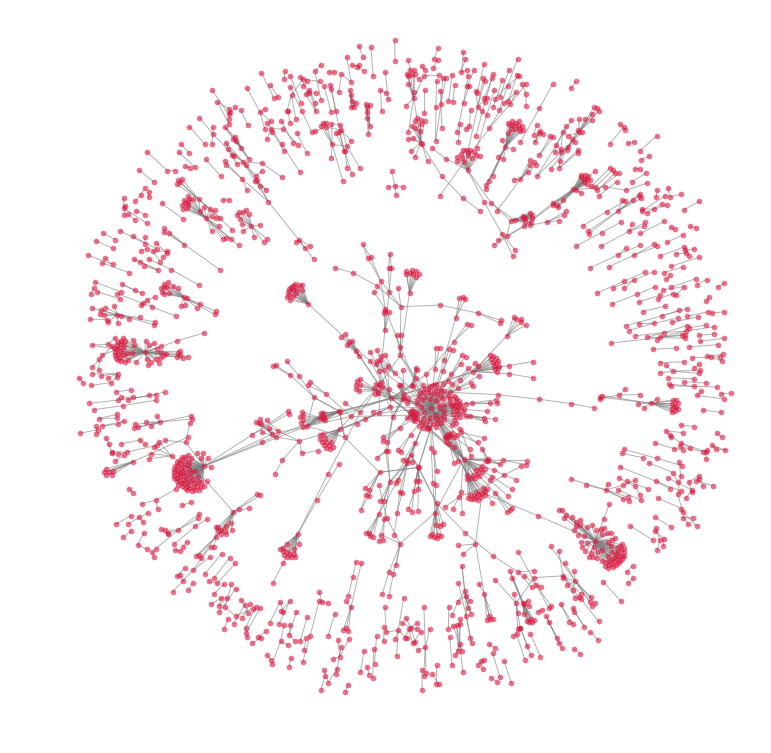

In [25]:
# Previewing the Graph
pos = nx.spring_layout(graph, k=0.05, seed=14)

plt.figure(figsize=(10, 10))
nx.draw(graph, pos=pos, edge_color="grey", node_color="crimson",
        linewidths=0.1, node_size=30, alpha=0.6, with_labels=False)
plt.show()

## Network graph analysis

### Total number of nodes and edges

In [26]:
# Number of nodes
print('Number of nodes: %d' %graph.number_of_nodes())

Number of nodes: 1896


In [27]:
# Number of edge
print('Number of edges: %d' %graph.number_of_edges())

Number of edges: 1824


### Network degree

In [28]:
degrees = [degree for node, degree in graph.degree()]

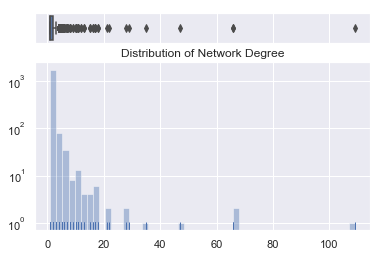

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(degrees, ax=ax_box)
sns.distplot(degrees, ax=ax_hist, kde=False, rug=True)

ax_box.set(xlabel='')
plt.yscale('log')
plt.title('Distribution of Network Degree')
plt.show()

In [30]:
print('Max degree: %d' % np.max(degrees))
print('Min degree: %d' % np.min(degrees))
print('Average degree: %f' % np.mean(degrees))
print('Most frequent degree: %d' % stats.mode(degrees)[0][0])

Max degree: 109
Min degree: 1
Average degree: 1.924051
Most frequent degree: 1


### Network density

In [31]:
nnodes = graph.number_of_nodes()
nedges = graph.number_of_edges()
dens = graph.number_of_edges()/comb(N=nnodes, k=2, exact=True)
print('Network density: %f' %dens)

Network density: 0.001015


### Clustering and transitivity

In [32]:
print('Clustering Coefficient of Network: %f' %nx.average_clustering(graph))
print('Transitivity of Network: %f' %nx.transitivity(graph))

Clustering Coefficient of Network: 0.060121
Transitivity of Network: 0.025428


In [33]:
print('Is the graph connected: %s' %nx.is_connected(graph))
print('Number of connected component: %d' %nx.number_connected_components(graph))

Is the graph connected: False
Number of connected component: 334


In [34]:
component_size = [len(g) for g in list(nx.connected_component_subgraphs(graph))]

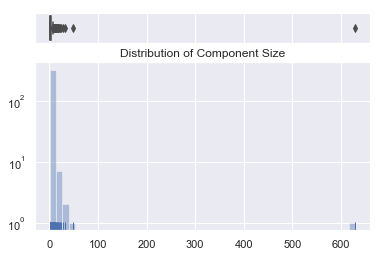

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(component_size, ax=ax_box)
sns.distplot(component_size, ax=ax_hist, kde=False, rug=True)

ax_box.set(xlabel='')
plt.yscale('log')
plt.title('Distribution of Component Size')
plt.show()

In [36]:
top_ten = sorted(nx.connected_component_subgraphs(
    graph), key=len, reverse=True)[:10]
len_top_ten_cc = [len(g) for g in top_ten]

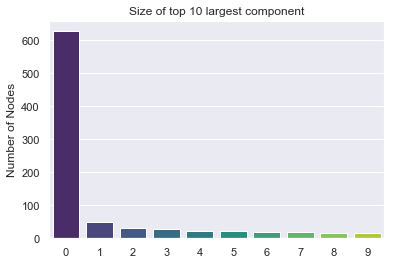

In [37]:
sns.barplot(x=list(range(0, 10)), y=len_top_ten_cc, palette="viridis")
plt.title('Size of top 10 largest component')
plt.ylabel('Number of Nodes')
plt.show()

In [38]:
print('Number of nodes in largest component: %d' % top_ten[0].number_of_nodes())
print('Number of edges in largest component: %d' % top_ten[0].number_of_edges())
print('Is the graph connected: %s' % nx.is_connected(top_ten[0]))

nnodes = top_ten[0].number_of_nodes()
nedges = top_ten[0].number_of_edges()
dens = top_ten[0].number_of_edges()/comb(N=nnodes, k=2, exact=True)


print('Network density: %f' %dens)

print('Clustering Coefficient of Network: %f' %nx.average_clustering(top_ten[0]))

print('Transitivity of Network: %f' %nx.transitivity(top_ten[0]))

Number of nodes in largest component: 628
Number of edges in largest component: 789
Is the graph connected: True
Network density: 0.004008
Clustering Coefficient of Network: 0.082573
Transitivity of Network: 0.020040


In [39]:
node_component = {}

for i, g in enumerate(top_ten):
    for node in g.nodes:
        node_component[node] = i

In [40]:
subgraph = graph.copy()

node_component_sorted = []

for node in graph.nodes:
    component = node_component.get(node, None)
    if component is not None:
        node_component_sorted.append(component)
    else:
        subgraph.remove_node(node)

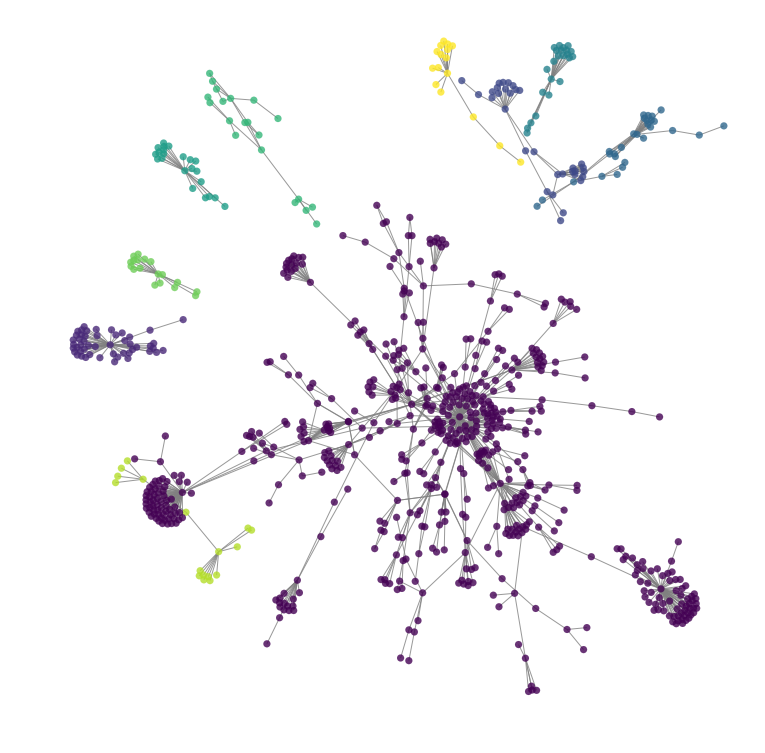

In [41]:
fig = plt.figure(figsize=(10, 10))


pos = nx.spring_layout(graph, k=0.05, seed=14)
nx.draw(subgraph, pos=pos, edge_color="grey", node_color=node_component_sorted, cmap=plt.cm.viridis,
        linewidths=0.1, node_size=50, alpha=0.8, with_labels=False)
plt.show()